In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import linear data

In [2]:
df1=pd.read_csv('linear_data.csv')

In [3]:
df1.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [5]:
x_linear=df1[['x']]

In [6]:
y_linear=df1[['y']]

# import nonlinear data

In [7]:
df2=pd.read_csv('nonlinear_data.csv')

In [8]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [9]:
x_nonlinear=df2[['x']]

In [10]:
y_nonlinear=df2[['y']]

# Visual representation

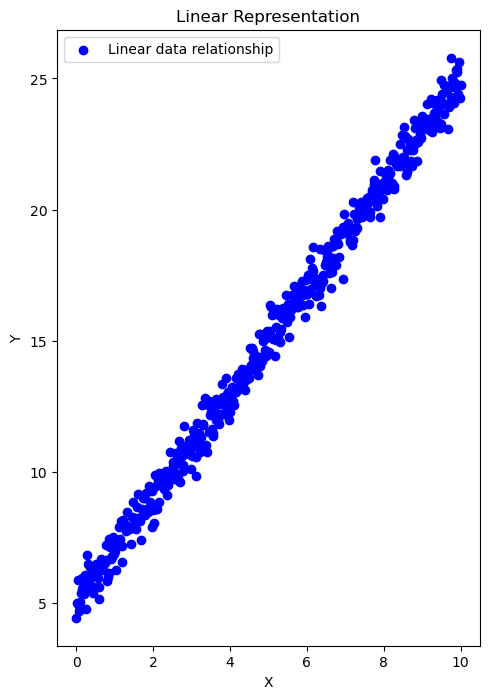

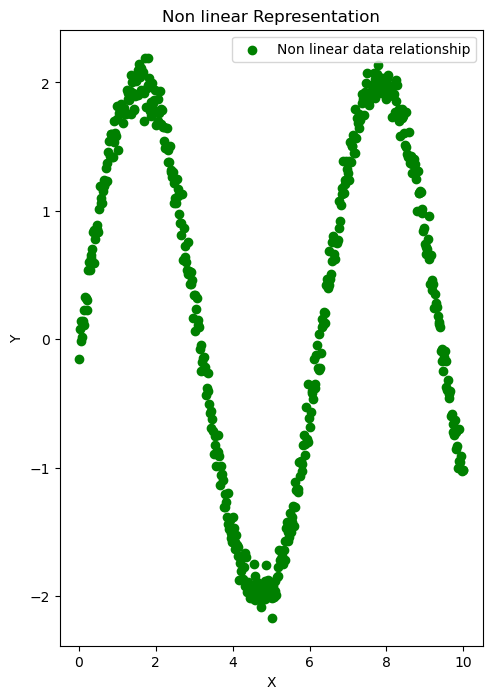

In [15]:
#Linear Representation

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.scatter(x_linear, y_linear, color='blue', label='Linear data relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Representation')
plt.legend()
plt.show()


#Nonlinear Representation

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 2)
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Non linear data relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non linear Representation')
plt.legend()
plt.show()

# correlation calculation

In [16]:
df1.corr() #for linear

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [17]:
df2.corr() #for non linear

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


# Linear regression for linear data

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg1=LinearRegression()

In [20]:
reg1.fit(x_linear, y_linear)

LinearRegression()

In [21]:
reg1.score(x_linear,y_linear)

0.9928923730526016

In [24]:
predicted_linear=reg1.predict(x_linear)
reg1.score(x_linear, predicted_linear)

1.0

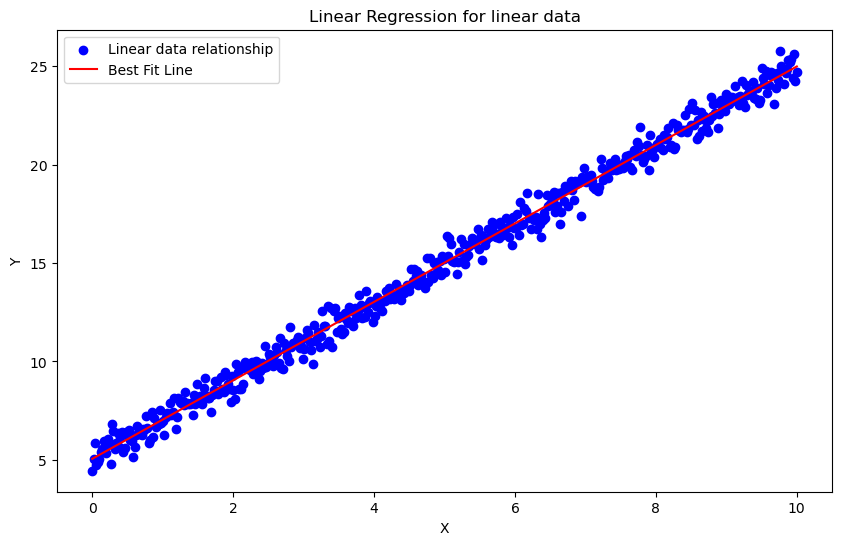

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(x_linear, y_linear, color='blue', label='Linear data relationship')
plt.plot(x_linear,predicted_linear, color='red', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression for linear data')
plt.legend()
plt.show()

# linear regression for nonlinear data

In [26]:
reg2=LinearRegression()

In [27]:
reg2.fit(x_nonlinear, y_nonlinear)

LinearRegression()

In [28]:
reg2.score(x_nonlinear, y_nonlinear)

0.004321199719043767

In [30]:
predicted_nonlinear=reg2.predict(x_nonlinear)

In [31]:
reg2.score(x_nonlinear, predicted_nonlinear)

1.0

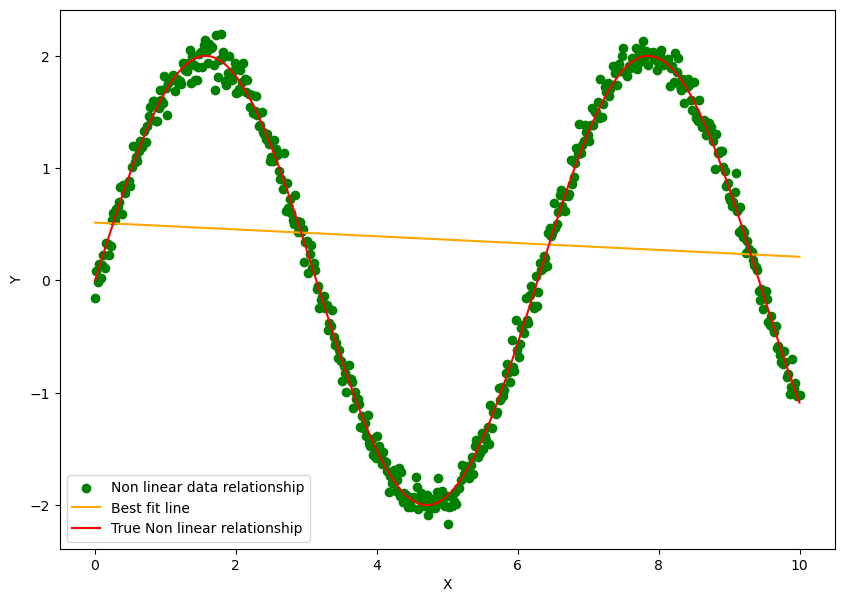

In [36]:
plt.figure(figsize=(10,7))
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Non linear data relationship')
plt.plot(x_nonlinear, predicted_nonlinear, color='orange', label='Best fit line')
plt.plot(x_nonlinear, 2*np.sin(x_nonlinear), color='red', label='True Non linear relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# polynomial regression for non linear data to achieve better performance

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly=PolynomialFeatures(degree=5)

In [39]:
x_poly=poly.fit_transform(x_nonlinear)

In [41]:
x_poly.shape

(500, 6)

In [42]:
reg_poly=LinearRegression()

In [43]:
reg_poly.fit(x_poly, y_nonlinear)

LinearRegression()

In [44]:
reg_poly.score(x_poly,y_nonlinear)

0.9301853282900984

In [48]:
predicted_nonlinearpoly=reg_poly.predict(x_poly)

In [50]:
#from sklearn.metrics import r2_score
#r2_score(x_poly, predicted_nonlinearpoly)

In [52]:
#plt.plot(x_poly, predicted_nonlinearpoly)

# Separate train test

In [53]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test= train_test_split(x_poly,y_nonlinear, test_size=.30, random_state=1)
reg=LinearRegression()

In [57]:
reg.fit(x_train, y_train)

LinearRegression()

# train score

In [58]:
reg.score(x_train, y_train)

0.9312981335540138

# Testing Score

In [59]:
reg.score(x_test, y_test)

0.9257350008607829